<a href="https://colab.research.google.com/github/Glutamato/BasesSIR/blob/master/Copia_de_%5BLecture_7%5DEulerError.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

## La Solución numérica, por el método de Euler, para el sistema:

$$ \frac{dy}{dt} = y $$

$$ y(0) = 1 $$

## esta dada por la fórmula: 

$$ y_{n+1} = (1+ \delta t) \times y_n $$


In [ ]:
ys = [1] # creamos un arreglo inicial de valores en y
ts = [0] # creamos un arreglo inicial de valores en t
dt = 0.01
num_steps = 1000
for i in range(num_steps):
    ts.append(ts[-1]+dt) # calculamos el proximo t y lo agregamos al arreglo 
    ys.append((1+dt)*ys[-1]) # calculamos el proximo y y lo agregamos al arreglo 

print(ts)
print(ys)

[0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.060000000000000005, 0.07, 0.08, 0.09, 0.09999999999999999, 0.10999999999999999, 0.11999999999999998, 0.12999999999999998, 0.13999999999999999, 0.15, 0.16, 0.17, 0.18000000000000002, 0.19000000000000003, 0.20000000000000004, 0.21000000000000005, 0.22000000000000006, 0.23000000000000007, 0.24000000000000007, 0.25000000000000006, 0.26000000000000006, 0.2700000000000001, 0.2800000000000001, 0.2900000000000001, 0.3000000000000001, 0.3100000000000001, 0.3200000000000001, 0.3300000000000001, 0.34000000000000014, 0.35000000000000014, 0.36000000000000015, 0.37000000000000016, 0.38000000000000017, 0.3900000000000002, 0.4000000000000002, 0.4100000000000002, 0.4200000000000002, 0.4300000000000002, 0.4400000000000002, 0.45000000000000023, 0.46000000000000024, 0.47000000000000025, 0.48000000000000026, 0.49000000000000027, 0.5000000000000002, 0.5100000000000002, 0.5200000000000002, 0.5300000000000002, 0.5400000000000003, 0.5500000000000003, 0.5600000000000003, 0.57

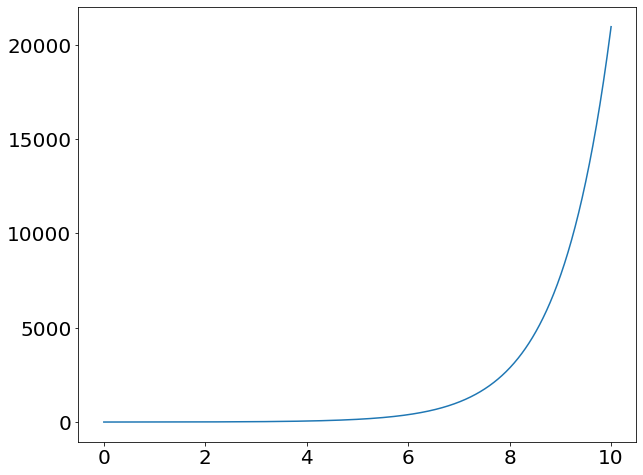

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(ts, ys)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

# La solución numérica mejora a medida que $\Delta t $ es más pequeño

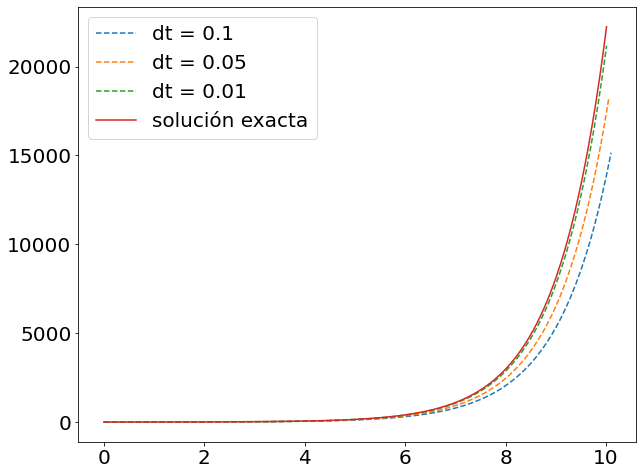

In [ ]:
def exact_sol(ts): return np.exp(ts)

def num_sol(ts, dt, tf=10, y0 = 1):
    ys = [y0]
    ts = [0]
    num_steps = int(tf/dt)
    for i in range(num_steps+1):
        ts.append(ts[-1]+dt)
        ys.append((1+dt)*ys[-1])
    return ts, ys

plt.figure(figsize=(10, 8))
for dt in [0.1, 0.05, 0.01]:
    ts, ys = num_sol(ts, dt)
    plt.plot(ts, ys, '--', label = 'dt = {}'.format(dt))
plt.plot(ts, exact_sol(ts), label = 'solución exacta')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize = 20)
plt.show()

# Análisis del error numérico 

Dada una ecuación de la forma: 

$$ y' = f(t,y) $$

Para el método de Euler podemos aproximar el ETL con la fórmula:

$$ ETL (t_i) \sim \frac{1}{2} \Delta t^2 \frac{d f}{dt}(t_i)$$ 
 
con el correspondiente ETG dado por: 

$$ ETG (t_i) \sim \Delta t \left( \frac{M t_i}{2} \right)  $$

esto quiere decir que a lo sumo $ETG$ debe ser directamente proporcional a $\Delta t$.

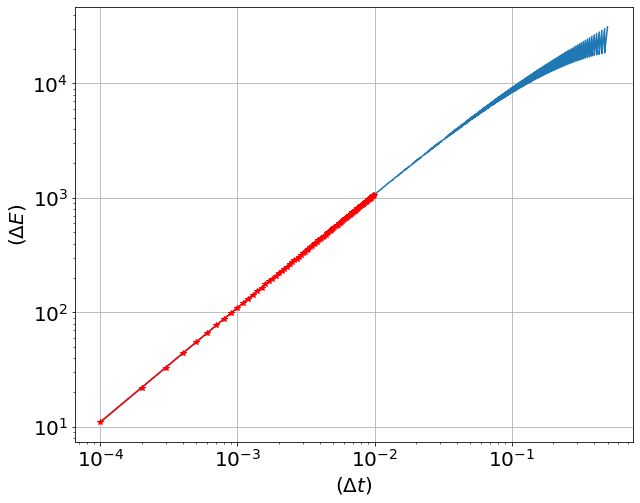

In [ ]:
plot_text_size = 20
local_error = []
dt_arr = np.arange(0.0001, 0.5, 0.0001)
for dt in dt_arr:
    ts, ys_num = num_sol(ts, dt=dt)
    ys_ex = exact_sol(ts)
    local_error.append(np.abs(ys_num[-1] - ys_ex[-1]))
plt.figure(figsize=(10, 8))
plt.xscale('log')
plt.yscale('log')
plt.plot(dt_arr, local_error)
plt.plot(dt_arr[:-4900], local_error[:-4900], '-*r')
plt.xticks(fontsize=plot_text_size)
plt.yticks(fontsize=plot_text_size)
plt.xlabel(r'$(\Delta t)$', fontsize = plot_text_size)
plt.ylabel(r'$(\Delta E)}$', fontsize = plot_text_size)
plt.grid(True)

# Podemos comprobar la relacion lineal con una regresión:

In [ ]:
from sklearn.linear_model import LinearRegression
x = np.log(dt_arr[:-4900]).reshape(-1, 1)
y = np.log(local_error[:-4900])
reg = LinearRegression().fit(x, y)
print(reg.score(x, y))
print(reg.coef_)

0.9999818383557955
[0.99261694]
